**A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA******

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
# import matplotlib as mpl
import matplotlib.pyplot as plt
# from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Reading the Dataset

In [6]:
df = pd.read_csv('./Student Mental health.csv')

In [7]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [8]:
df.shape

(100, 11)

In [9]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [10]:
df.nunique()

Timestamp                                       91
Choose your gender                               2
Age                                              7
What is your course?                            48
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [11]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [12]:
df = df.dropna(how='any',axis=0) 

In [13]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

# Data Visualization

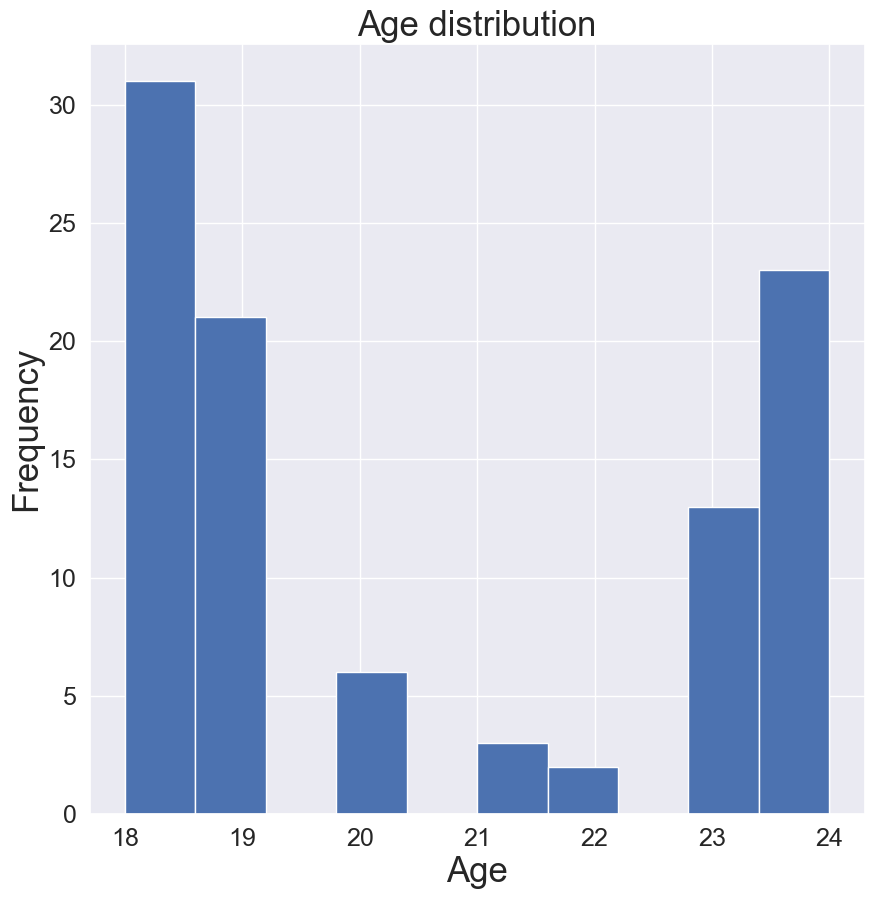

In [31]:

plt.figure(figsize=(10, 10))
plt.hist(df['Age'], color='b')
plt.title("Age distribution", fontsize=25) 
plt.xlabel("Age", fontsize=25) 
plt.ylabel("Frequency", fontsize=25) 

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [52]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: '8/7/2020 12:02'

In [15]:
df.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

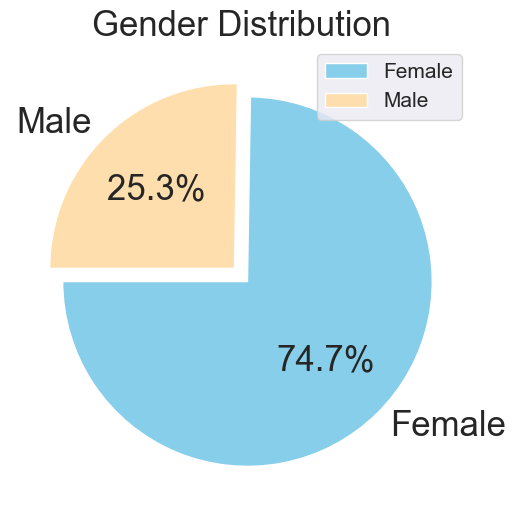

In [37]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.title("Gender Distribution", fontsize=25) 

g = plt.pie(df['gender'].value_counts(), explode=(0.05, 0.05), labels=df['gender'].value_counts().index,
            colors=['skyblue', 'navajowhite'], autopct='%1.1f%%', startangle=180, textprops={'fontsize': 25})

fontprops = FontProperties()
fontprops.set_size(15)
plt.legend(prop=fontprops)

plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

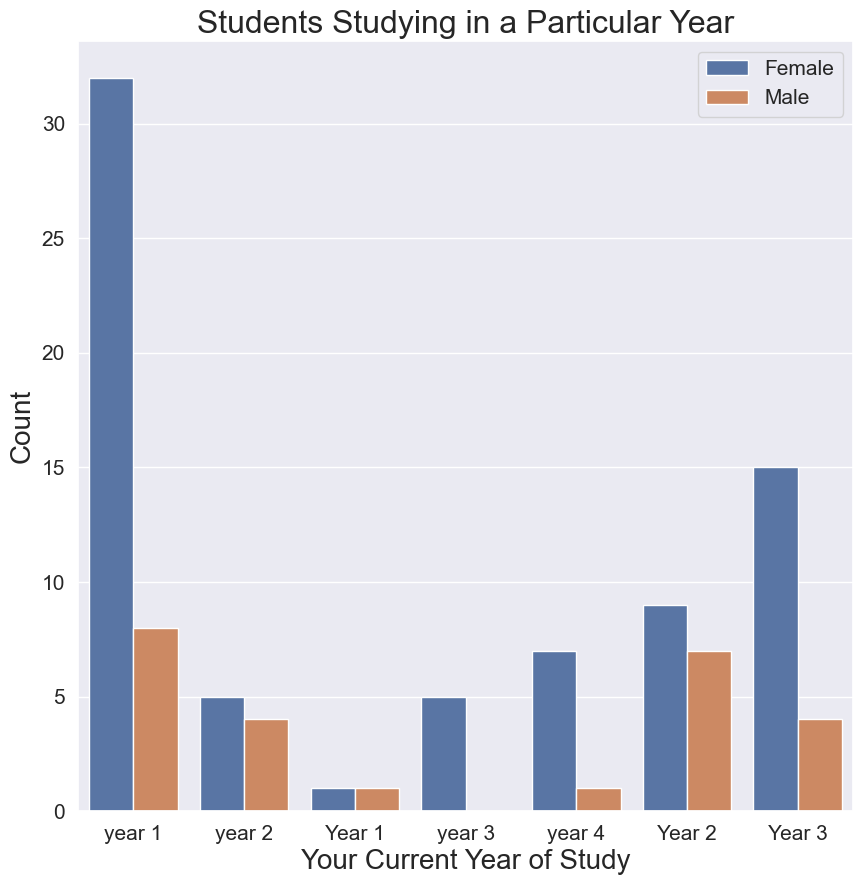

In [42]:

plt.figure(figsize=(10, 10))

sns_countplot = sns.countplot(x='Your current year of Study', hue='gender', data=df)

plt.title("Students Studying in a Particular Year", fontsize=23)
plt.xlabel("Your Current Year of Study", fontsize=20) 
plt.ylabel("Count", fontsize=20)  

sns_countplot.set_xticklabels(sns_countplot.get_xticklabels(), fontsize=15)
sns_countplot.set_yticklabels(sns_countplot.get_yticklabels(), fontsize=15)


plt.legend(fontsize=15) 

plt.show()

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

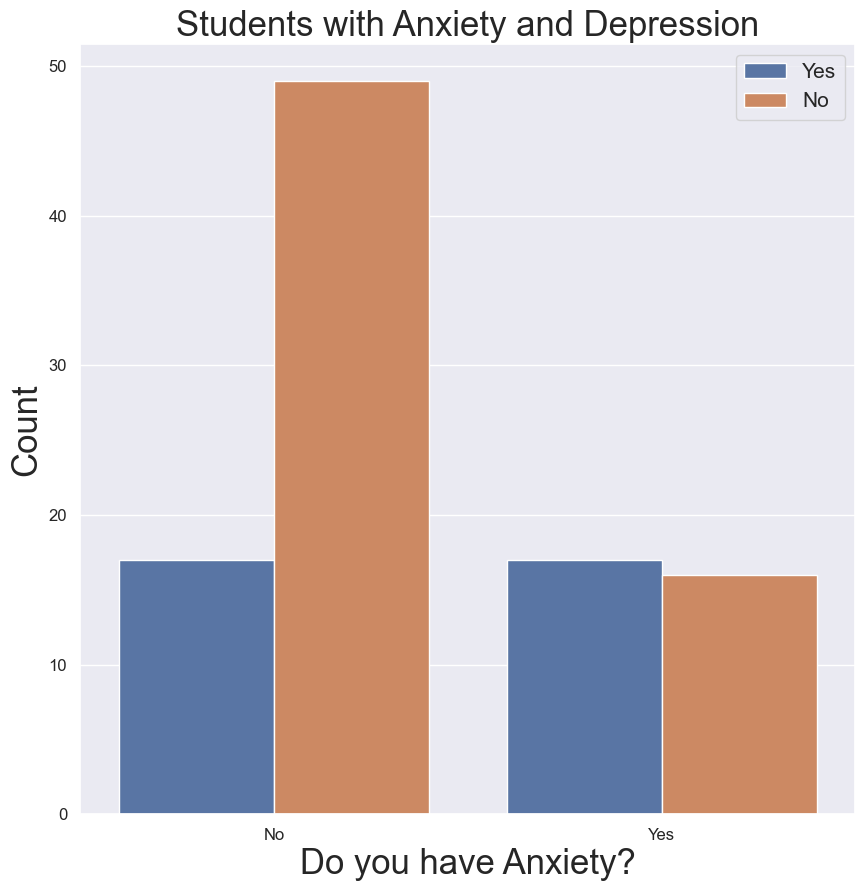

In [43]:

plt.figure(figsize=(10, 10))

sns_countplot = sns.countplot(x='Do you have Anxiety?', hue='Do you have Depression?', data=df)
plt.title("Students with Anxiety and Depression", fontsize=25) 
plt.xlabel("Do you have Anxiety?", fontsize=25)
plt.ylabel("Count", fontsize=25)


sns_countplot.set_xticklabels(sns_countplot.get_xticklabels(), fontsize=12)
sns_countplot.set_yticklabels(sns_countplot.get_yticklabels(), fontsize=12)

plt.legend(fontsize=15)  

plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

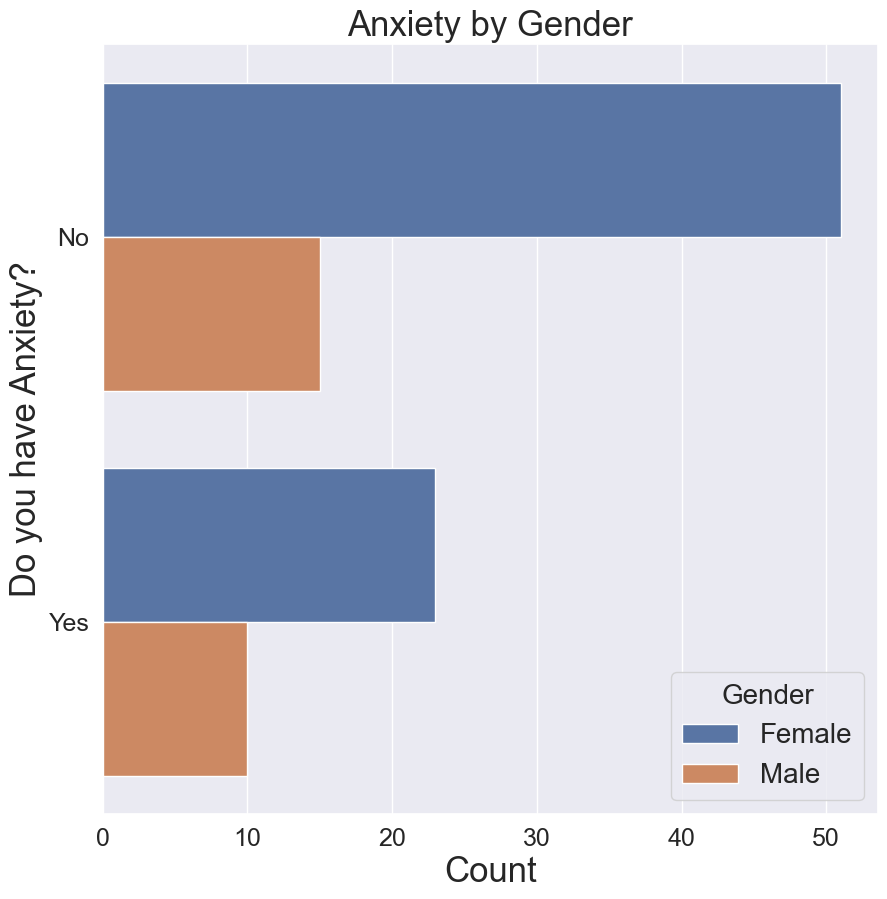

In [53]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")

# Create a countplot with Seaborn
ax = sns.countplot(y="Do you have Anxiety?", hue="gender", data=df)

# Increase font size for title and axis labels
plt.title("Anxiety by Gender", fontsize=25)  # You can adjust the fontsize as needed
plt.xlabel("Count", fontsize=25)  # You can adjust the fontsize as needed
plt.ylabel("Do you have Anxiety?", fontsize=25)  # You can adjust the fontsize as needed

# Increase font size for x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

# Increase font size for legend
plt.legend(title="Gender", fontsize=20, title_fontsize=20)  # You can adjust the fontsize as needed

plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

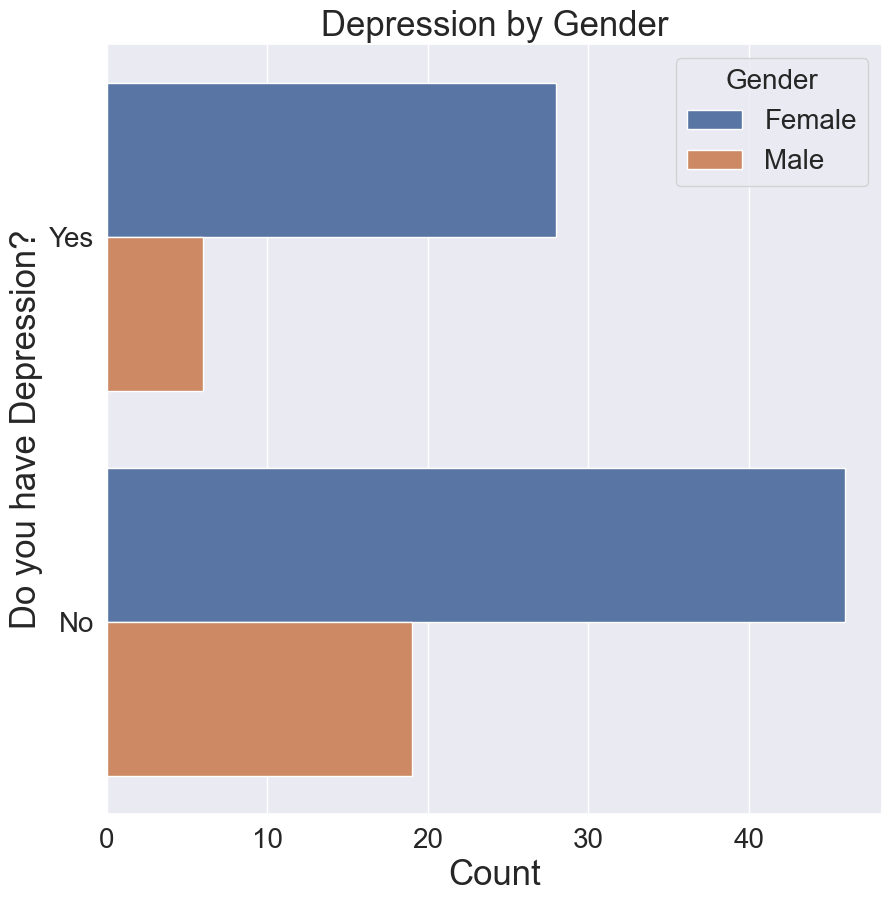

In [54]:


plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")

# Create a countplot with Seaborn
ax = sns.countplot(y="Do you have Depression?", hue="gender", data=df)

# Increase font size for title and axis labels
plt.title("Depression by Gender", fontsize=25)  # You can adjust the fontsize as needed
plt.xlabel("Count", fontsize=25)  # You can adjust the fontsize as needed
plt.ylabel("Do you have Depression?", fontsize=25)  # You can adjust the fontsize as needed

# Increase font size for x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

# Increase font size for legend
plt.legend(title="Gender", fontsize=20, title_fontsize=20)  # You can adjust the fontsize as needed

plt.show()


/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

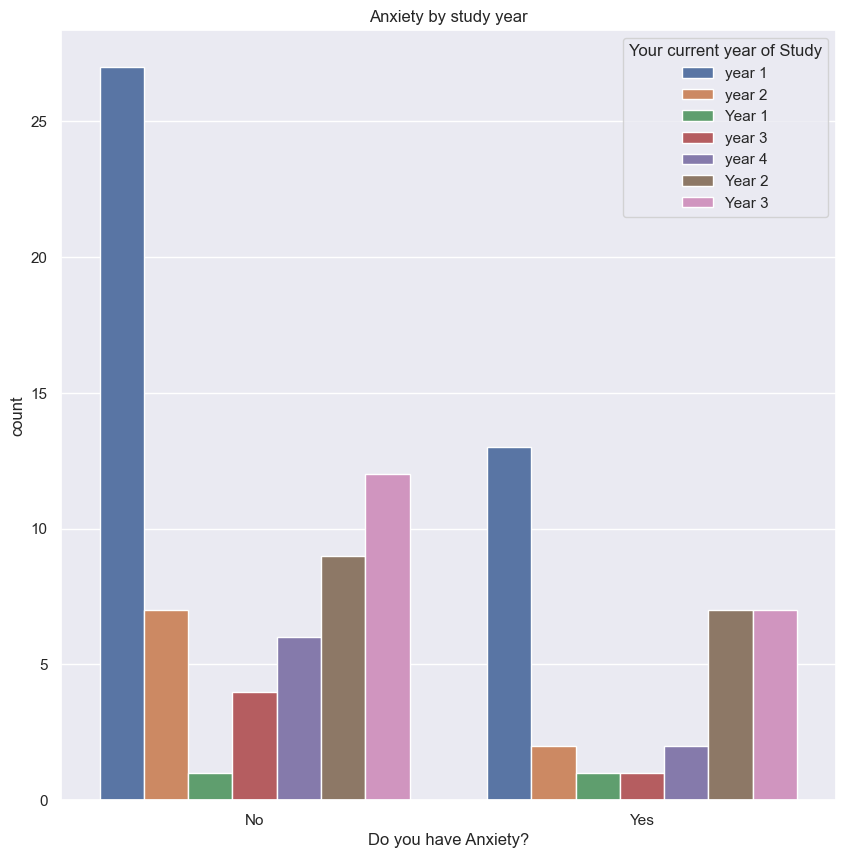

In [21]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

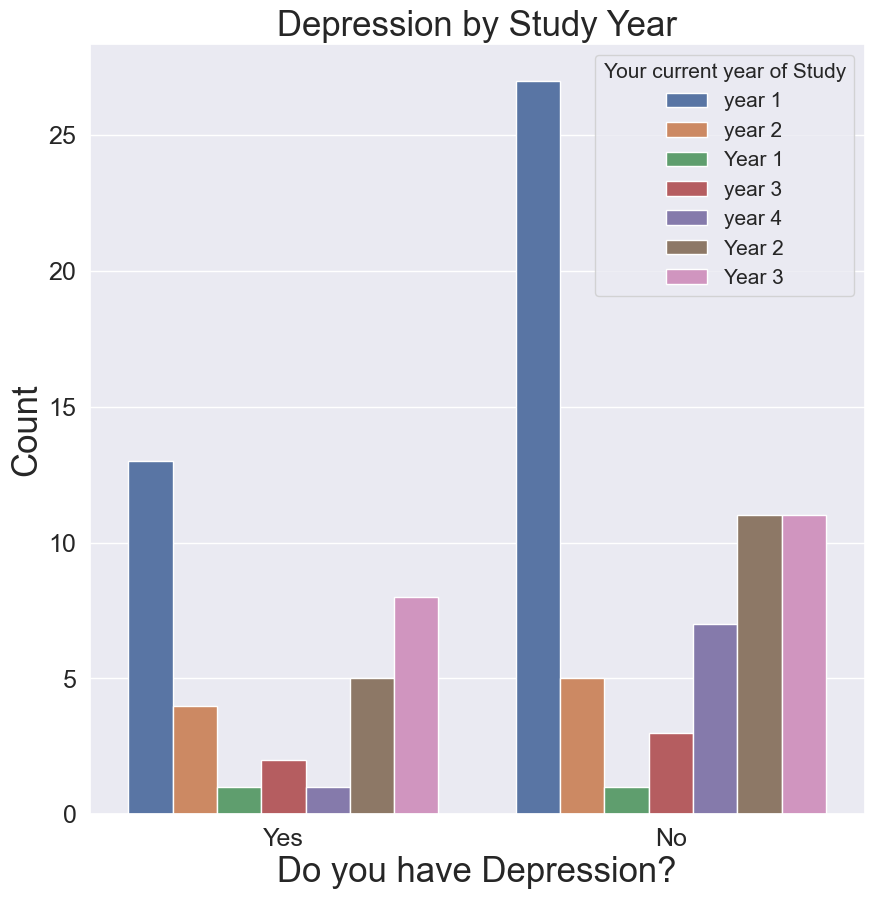

In [49]:

plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")

# Create a countplot with Seaborn
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=df)

# Increase font size for title and axis labels
plt.title("Depression by Study Year", fontsize=25)  # You can adjust the fontsize as needed
plt.xlabel("Do you have Depression?", fontsize=25)  # You can adjust the fontsize as needed
plt.ylabel("Count", fontsize=25)  # You can adjust the fontsize as needed

# Increase font size for x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)

# Increase font size for legend
plt.legend(title="Your current year of Study", fontsize=15, title_fontsize=15)  # You can adjust the fontsize as needed

plt.show()

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

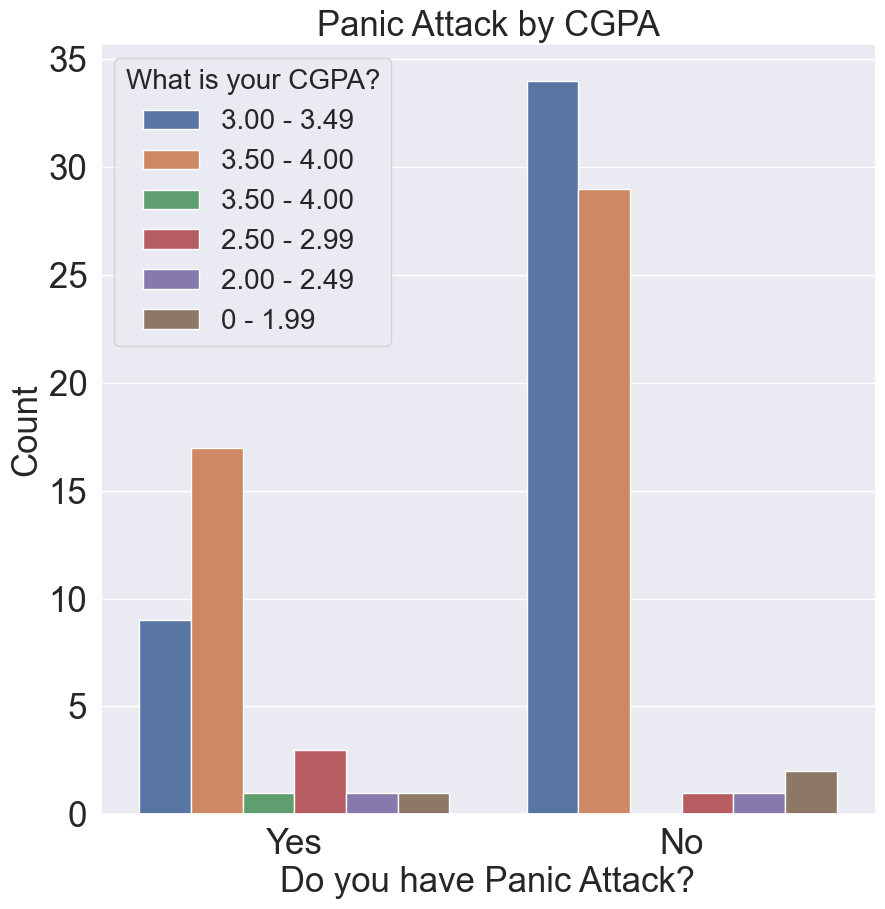

In [57]:

plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")

# Create a countplot with Seaborn
ax = sns.countplot(x="Do you have Panic attack?", hue="What is your CGPA?", data=df)

# Increase font size for title and axis labels
plt.title("Panic Attack by CGPA", fontsize=25)  # You can adjust the fontsize as needed
plt.xlabel("Do you have Panic Attack?", fontsize=25)  # You can adjust the fontsize as needed
plt.ylabel("Count", fontsize=25)  # You can adjust the fontsize as needed

# Increase font size for x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)

# Increase font size for legend
plt.legend(title="What is your CGPA?", fontsize=20, title_fontsize=20)  # You can adjust the fontsize as needed

plt.show()

In [80]:


# Function to calculate Euclidean distance between two numerical data points
from collections import Counter


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to calculate distance between categorical data points
def categorical_distance(x1, x2):
    return 0 if x1 == x2 else 1

# k-NN algorithm
def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []

    # Calculate the distance between the query point and all the points in the dataset
    for index, example in enumerate(data):
        numerical_features_distance = euclidean_distance(np.array(example[:4]), np.array(query[:4]))
        categorical_features_distance = sum(categorical_distance(example[i], query[i]) for i in range(4, len(example)-1))
        total_distance = numerical_features_distance + categorical_features_distance
        neighbor_distances_and_indices.append((total_distance, index))

    # Sort the distances and get the indices of the first k nearest neighbors
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    k_nearest_indices = [i[1] for i in sorted_neighbor_distances_and_indices[:k]]

    # Get the labels of the k nearest neighbors
    k_nearest_labels = [data[i][-1] for i in k_nearest_indices]

    # Return the majority voted class label
    return choice_fn(k_nearest_labels)

# Function to determine the majority voted class label
def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    return winner

# Example usage
query_point = [20, 'Male', 'Biomedical science', 'Year 2', 3.25, 'No', 'No', 'No', 'No']
k = 3
prediction = knn(df, query_point, k, None, majority_vote)
print("Predicted class:", prediction)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U4'), dtype('<U21')) -> None

In [75]:
year_mapping = {'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4, 'year 5': 5}  # Adjust as needed
df['Your current year of Study'] = df['Your current year of Study'].map(year_mapping)

# Replace 'Yes' with 1 and 'No' with 0 for selected columns
binary_columns = ["Do you have Depression?", "Do you have Anxiety?", "Do you have Panic attack?", "Did you seek any specialist for a treatment"]
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Select numerical and binary columns for correlation matrix
numerical_columns = ["Age", "Your current year of Study", "CGPA"]
all_columns = numerical_columns + binary_columns
selected_df = df[all_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

KeyError: "['Did you seek any specialist for a treatment'] not in index"